In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Camp DS/Task4/Car_Insurance_Claim.csv")
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [27]:
nan_count = df.isna().sum()
nan_count

Unnamed: 0                0
ID                        0
AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

In [34]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df[df['CREDIT_SCORE'] != 'none']
df = df[df['ANNUAL_MILEAGE'] != 'none']
df = df[df['POSTAL_CODE'] != 'none']
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median(), inplace=True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median(), inplace=True)

cols_to_check = ['POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']
df.dropna(subset=cols_to_check, inplace=True)

df['CREDIT_SCORE'] = df['CREDIT_SCORE'].astype(float)
df['CREDIT_SCORE_GROUP'] = pd.cut(df['CREDIT_SCORE'], bins=10)

df['POSTAL_CODE'] = df['POSTAL_CODE'].astype(int)

nan_count = df.isna().sum()
nan_count

ID                      0
AGE                    49
GENDER                 49
RACE                   45
DRIVING_EXPERIENCE     48
EDUCATION              45
INCOME                  0
CREDIT_SCORE            0
VEHICLE_OWNERSHIP      48
VEHICLE_YEAR           50
MARRIED                46
CHILDREN               47
POSTAL_CODE             0
ANNUAL_MILEAGE          0
VEHICLE_TYPE           47
SPEEDING_VIOLATIONS     0
DUIS                    0
PAST_ACCIDENTS          0
OUTCOME                 0
CREDIT_SCORE_GROUP      0
dtype: int64

<Figure size 576x432 with 0 Axes>

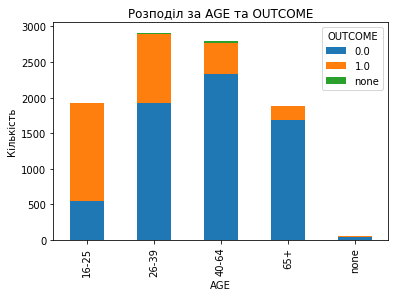

<Figure size 576x432 with 0 Axes>

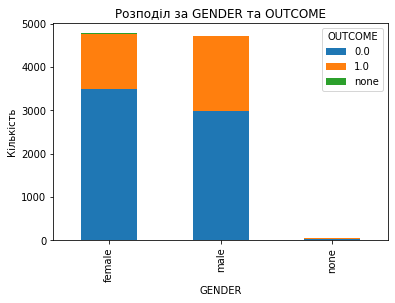

<Figure size 576x432 with 0 Axes>

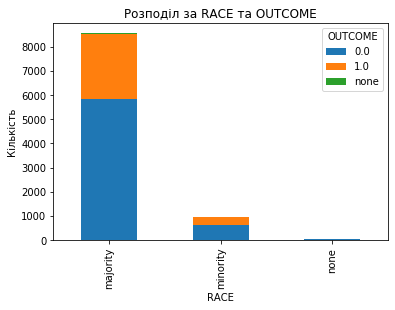

<Figure size 576x432 with 0 Axes>

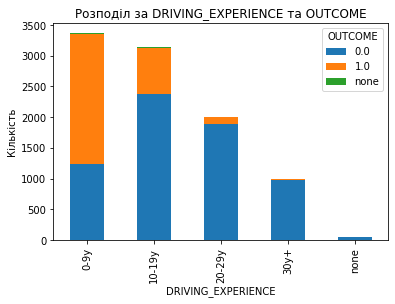

<Figure size 576x432 with 0 Axes>

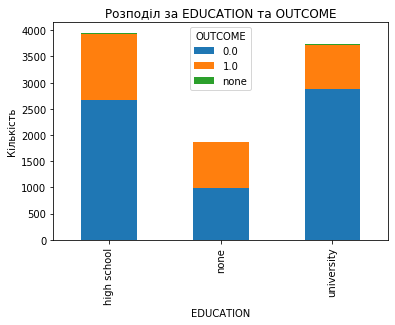

<Figure size 576x432 with 0 Axes>

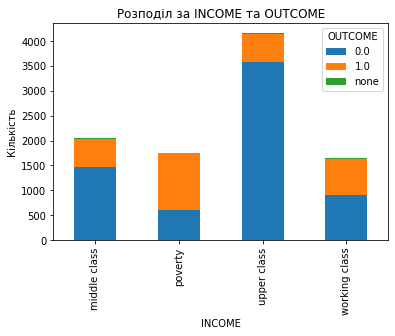

<Figure size 576x432 with 0 Axes>

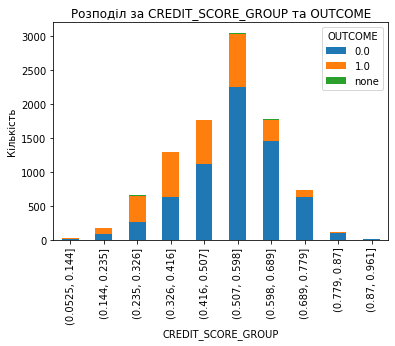

<Figure size 576x432 with 0 Axes>

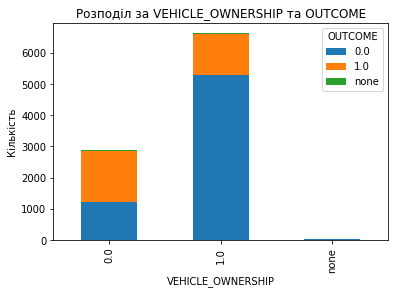

<Figure size 576x432 with 0 Axes>

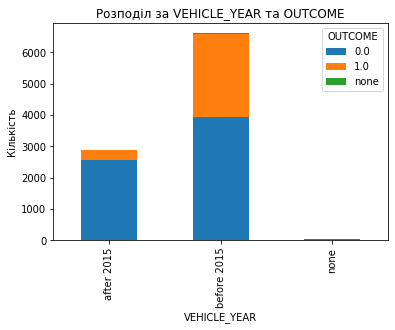

<Figure size 576x432 with 0 Axes>

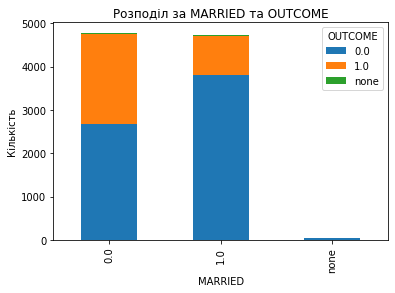

<Figure size 576x432 with 0 Axes>

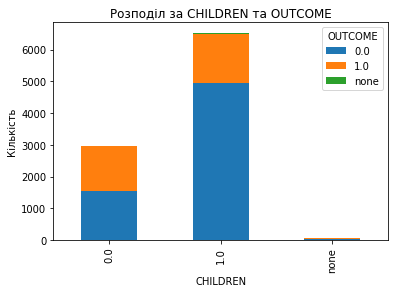

<Figure size 576x432 with 0 Axes>

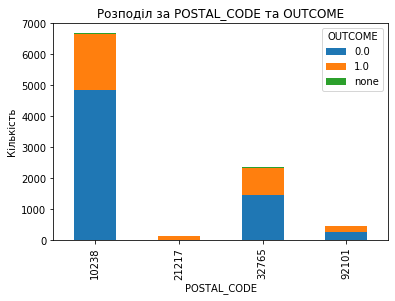

<Figure size 576x432 with 0 Axes>

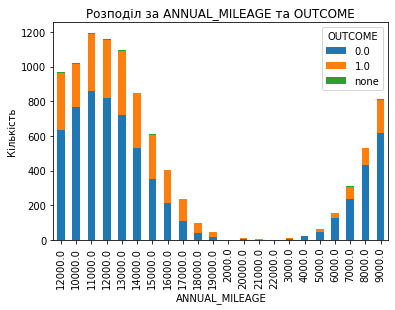

<Figure size 576x432 with 0 Axes>

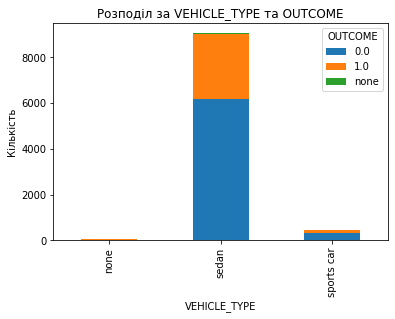

<Figure size 576x432 with 0 Axes>

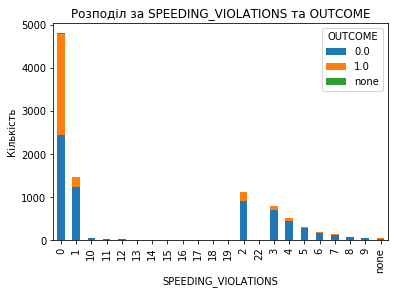

<Figure size 576x432 with 0 Axes>

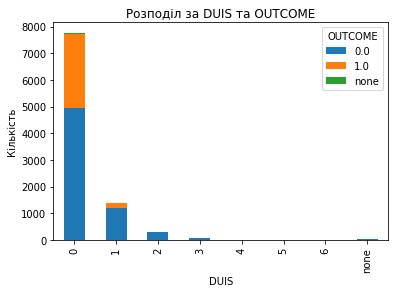

<Figure size 576x432 with 0 Axes>

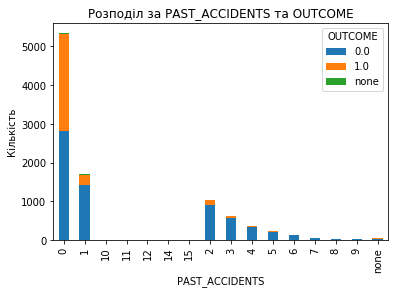

In [35]:
columns = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE_GROUP', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

for column in columns:
    plt.figure(figsize=(8, 6))
    df.groupby([column, 'OUTCOME']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Розподіл за {column} та OUTCOME')
    plt.ylabel('Кількість')
    plt.show()


<Figure size 576x432 with 0 Axes>

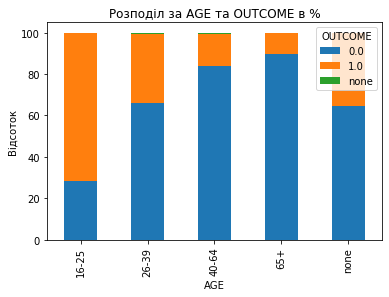

<Figure size 576x432 with 0 Axes>

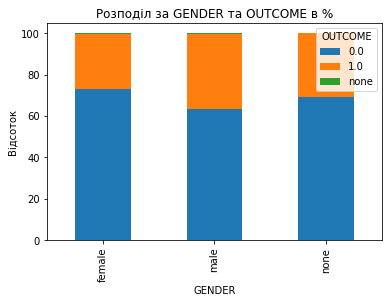

<Figure size 576x432 with 0 Axes>

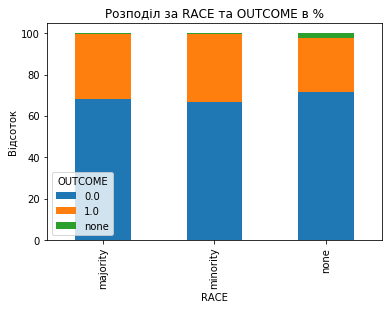

<Figure size 576x432 with 0 Axes>

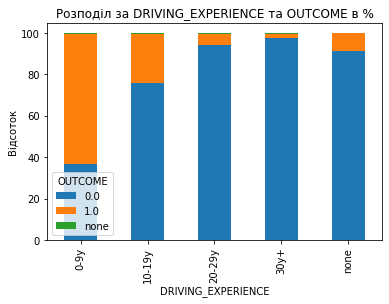

<Figure size 576x432 with 0 Axes>

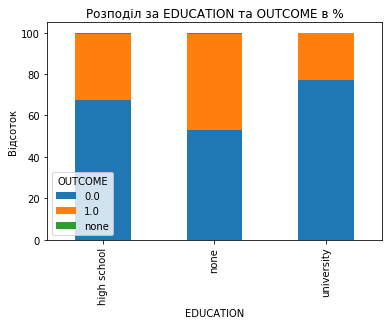

<Figure size 576x432 with 0 Axes>

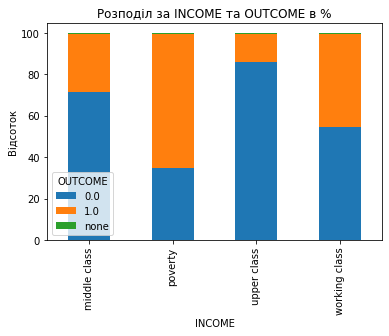

<Figure size 576x432 with 0 Axes>

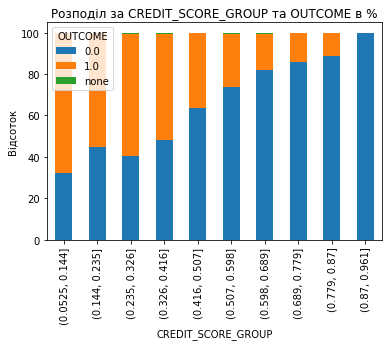

<Figure size 576x432 with 0 Axes>

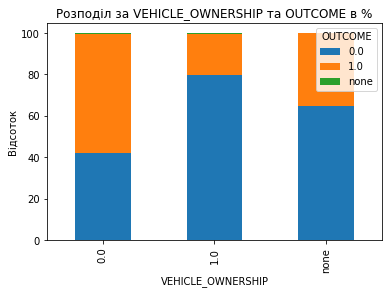

<Figure size 576x432 with 0 Axes>

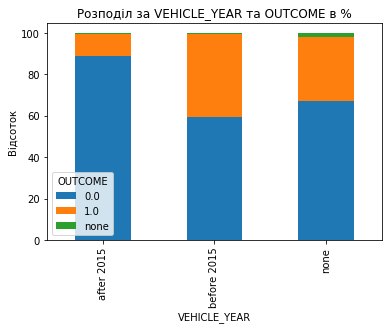

<Figure size 576x432 with 0 Axes>

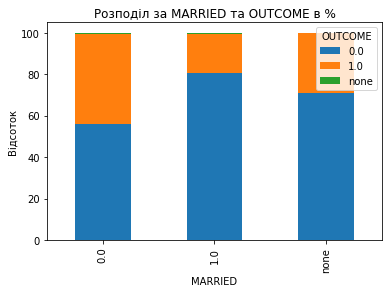

<Figure size 576x432 with 0 Axes>

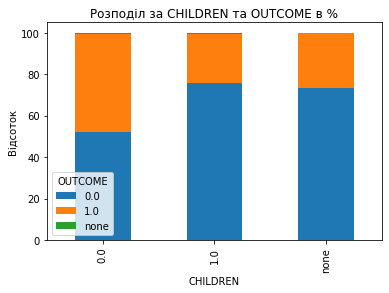

<Figure size 576x432 with 0 Axes>

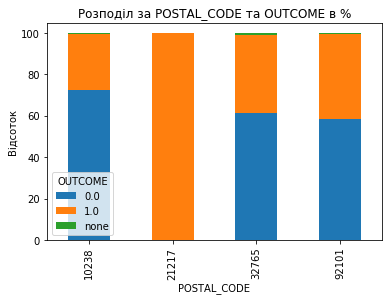

<Figure size 576x432 with 0 Axes>

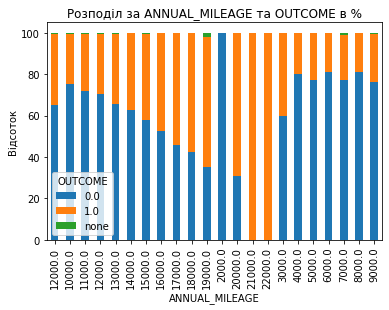

<Figure size 576x432 with 0 Axes>

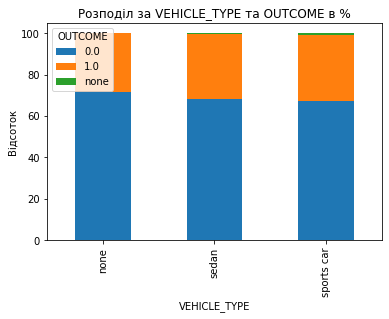

<Figure size 576x432 with 0 Axes>

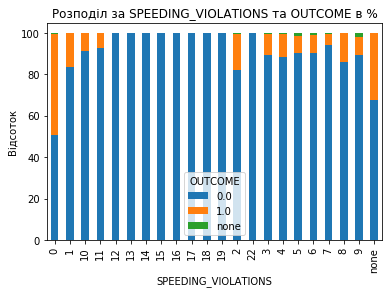

<Figure size 576x432 with 0 Axes>

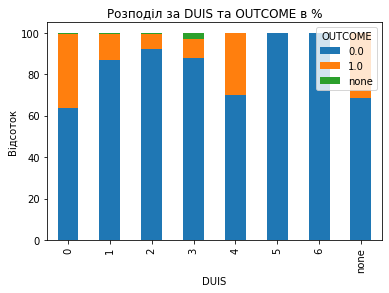

<Figure size 576x432 with 0 Axes>

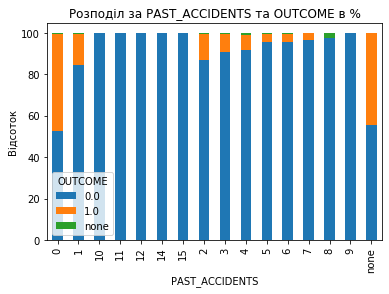

In [36]:
for column in columns:
    plt.figure(figsize=(8, 6))
    grouped = df.groupby([column, 'OUTCOME']).size().unstack().fillna(0)
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
    grouped_percentage.plot(kind='bar', stacked=True)
    plt.title(f'Розподіл за {column} та OUTCOME в %')
    plt.ylabel('Відсоток')
    plt.show()

Проаналізувавши графіки залежностей, можна зробити висновки, що найчастіше відмовляють в виплаті страхування:
    - особам старше 65 років;
    - особам з досвідом водіння 30+ років;
    - особам з credit score 0.5-0.6;
    - особам з правом власності на автомобіль;
    - якщо рік випуску автомобіля після 2015р;
    - пробіг автомобіля менший за 15000км;
    - при перевищенні швидкості;
    - при водінні в стані алкогольного сп'яніння;
    - при мунилих аваріях.